#1. 데이터 준비
> 본 데이터는 캐글(https://www.kaggle.com/)에서 연습문제로 지원해 주는 데이터이다. 캐글은 2010년 4월에 설립된 공공 및 기업 데이터를 활용한 머신러닝 경진대회 플랫폼이다. 

> 우리가 분석할 내용은 titanic 호에서 생존한 사람들에 대해 분석해 보려 한다.
##1.1 데이터 열기
> 구글 드라이브에 데이터를 업로드한 후 읽어들여 보자

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/3. 파이프라인/data/titanic.csv')
df

##1.2. 데이터 백업
> 데이터를 분석하다 보면 여러 가공과정을 거치면서 원본 데이터가 손실될 수 있다. 다양한 방법으로 분석하다 보면 원본을 다시 가져다 사용하는 경우가 빈번하다. 데이터를 백업함으로써 원본 데이터를 유지할 수 있다.

In [ ]:
df_titanic_backup = df.copy()

file_backup = '/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/3. 파이프라인/data/titanic_backup.csv'
df.to_csv(file_backup)

df_titanic_backup = pd.read_csv(file_backup)
df_titanic_backup

#2. 데이터 보기
##2.1 데이터의 기본 정보 확인
>info함수를 이용하여 데이터의 기본 정보를 확인할 수 있다.

In [ ]:
df.info()

> 설명달기

##2.2 기초 통계 정보 확인
> 기초 통계 정보를 확인하여 추후 어떠한 방향으로 데이터를 분석할지 생각해 본다.

In [ ]:
df.describe()

> 설명달기

##2.3 데이터 확인

In [ ]:
df.head()

In [ ]:
df.tail()

> 설명달기

##2.4 정렬

In [ ]:
#요금 기준 오름차순
df.sort_values(by=['Fare'], axis=0)

In [ ]:
#요금 기준 내림차순
df.sort_values(by=['Fare'], axis=0, ascending=False)

In [ ]:
#열 이름 기준
df.sort_index(axis=1)

#3. 데이터 클린징
##3.1 결측치 확인

In [ ]:
df.count()

> 설명달기

In [ ]:
df.isnull().sum()

> 설명달기

##3.2 결측치 시각화
###3.2.1 heatmap
> heatmap은 데이터의 분포상태를 표현하는 시각화 도구이다. heatmap는 두 개의 카테고리 정보를 한눈에 알아 볼 수 있다는 장점이 있다.

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull())

> 기본 정보는 위와 같이 나타난다.

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

>cbar 옵션은 colorbar를 의미하는 것으로 기존 그래프에서 나타났던 왼쪽 기준표이며 cbar=False로 지정하게 되면 왼쪽 기준표를 숨길 수 있다.

In [ ]:
sns.heatmap(df.isnull(), center=0.4)

>center 옵션은 기준 위치를 지정하는 것으로 기준값보다 높으면 붉은색 계열로 기준값보다 낮으면 파란색 계열로 표시한다. 이는 heatmap이 온도를 표현한 그래프이기 때문에 그렇다. 기준이 되는 center는 검정색으로 나타난다.

In [ ]:
sns.heatmap(df.isnull(), center=0.4, linewidths=0.0001)

>linewidths는 각 데이터를 선으로 구분짓기 위해 사용하는 옵션으로 현재는 데이터가 너무 많아 수치를 작게 표현했다.

> 그 이외에도 여러 옵션이 있으며 다음 사이트를 참고하기 바란다.
* https://dsbook.tistory.com/51

###3.2.2 missingno
>위키 백과를 확인하면 아래와 같이 정의되어 있다.
* https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%8B%B1%EB%85%B8

>미싱노(영어: MissingNo. 또는 MissingNO[1], 일본어: けつばん 케츠반[*])는 닌텐도의 《포켓몬스터 적·녹》에서 발견되었던 버그(glitch) 포켓몬이다. “결번(Missing Number)”을 의미하는 미싱노는 개발자인 게임 프리크가 에러 핸들러로 이용한 것으로, 존재하지 않는 포켓몬[2]의 데이터에 접근을 시도할 경우 나타난다. 프로그램된 세 개의 이벤트가 연속 실행되면 일종의 버그로서 미싱노를 만날 수 있게 된다. 닌텐도가 처음으로 미싱노를 공식적으로 언급한 것은 《닌텐도 파워》 1999년 5월호를 통해서였다.

> 미싱노가 나타나면 그래픽 에러가 나타나거나 플레이어의 아이템 메뉴 상의 여섯 번째 아이템이 다중 복제된다. 미싱노는 전략 가이드와 게임 매거진에서 소개되었으며, IGN에서 가장 유명한 게임 버그의 하나로 다룬 바 있다. 포켓몬 적·녹 시리즈의 팬들은 미싱노를 게임 카논(설정)의 일부로서 합리화하려 했으며, 이러한 소프트웨어 에러의 창의적 활용은 사회학자들의 연구 대상이 되기도 했다.[3]

In [ ]:
import missingno as msno
# msno.matrix(df)
# msno.matrix(df, figsize=(8,4))
msno.matrix(df, figsize=(8,4), color=(0.5, 0.5, 0.2))

>위와 같이 heatmap과 비슷한 결과를 얻을 수 있다.
* figsize : x, y의 크기를 지정하여 그래프를 표현한다.
* color : RGB로 표현되며 0~1사이의 값을 입력할 수 있다.

In [ ]:
msno.bar(df, figsize=(8, 4))

> 위와 같이 막대바를 이용하여 결측치를 확인할 수 있다.

In [ ]:
msno.dendrogram(df, figsize=(8, 4))

> dendrogram은 계층적 클러스터링 알고리즘을 활용한 누락 데이터 시작화 방법이다.

###3.2.3 결측치 제거
> 가장 결측치가 많이 발생한 객실번호(Cabin)을 처리해 보자. 사실 객실번호가 분석에 큰 영향을 주지 않기 때문에 제거하면 그만이다. 하지만 최대한 살릴 수 있는 데이터가 존재한다면 살려서 사용해야 한다.

>결측치를 대체하는 방법은 다음과 같다.
* 평균값
* 중간값
* 최빈값

> 현재 결측치가 발생한 값은 객실번호이며 방을 101.3호실과 같은 방법으로 표현하는 것이 아니기 때문에 평균은 사용할 수 없다.
또한 방에 들어갈 수 있는 인원은 제한 적이기 때문에 중간값이나 최빈값 역시 사용할 수 없다.

In [ ]:
df_dropna_row = df.dropna()
df_dropna_row

> 설명달기

In [ ]:
df_dropna_col = df.dropna(axis=1)
df_dropna_col

> 설명달기

In [ ]:
import numpy as np
df_nan = df.append([np.nan])
# df_nan
# df_nan_dropna = df_nan.dropna(how='all')
df_nan_dropna = df_nan.dropna(how='all', axis=1)
df_nan_dropna

> 설명달기

In [ ]:
cabin_count = df['Cabin'].notnull().sum()+1
df_dropna_thresh = df.dropna(thresh=cabin_count, axis=1)
msno.matrix( df_dropna_thresh , figsize=(8, 4), sparkline=False)

> 설명달기

###3.2.4 결측치 치환
>이번에는 결측치의 치환에 대해 알아보자. 결측치 치환 시 다음과 같은 방법들을 적용할 수 있다.
* 연관성 찾기
* 대표값 찾기

####3.2.4.1 탑승 항구(Embarked)

In [ ]:
print(df_dropna_thresh[df_dropna_thresh['Embarked'].isna()])
# df_dropna_thresh[50:70]
df_dropna_thresh[820:840]

> 설명달기

In [ ]:
# df_dropna_thresh.dtypes
df_dropna_thresh[df_dropna_thresh['Ticket']=='113572']

> 설명달기

In [ ]:
# df_dropna_thresh.dtypes
df_dropna_thresh[df_dropna_thresh['Fare']==80]

> 설명달기

In [ ]:
print(df_dropna_thresh['Embarked'].value_counts())
df_dropna_thresh['Embarked']=df_dropna_thresh['Embarked'].fillna('S')
print(df_dropna_thresh.isnull().sum())
msno.matrix(df_dropna_thresh)

> 설명달기

In [ ]:
df_embarked = pd.DataFrame( df_dropna_thresh['Embarked'].value_counts())
df_embarked['idx'] = df_embarked.index
df_embarked[df_embarked['Embarked']==df_embarked['Embarked'].max()]['idx']

> 설명달기

####3.2.4.2 나이(Age)
> 나이는 연관성을 확인하는 것이 어려움으로 단순하게 평균을 이용하여 결측치를 치환해 보자

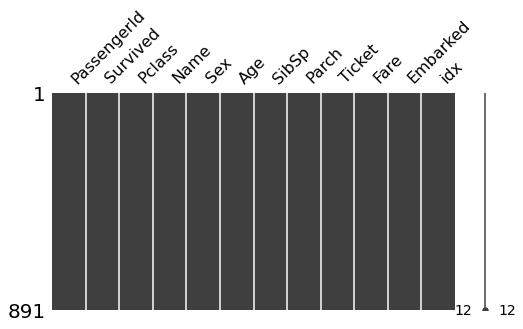

In [ ]:
ageMean = df_dropna_thresh['Age'].mean()
df_dropna_thresh['Age'] = df_dropna_thresh['Age'].fillna(ageMean)
msno.matrix(df_dropna_thresh, figsize=(8,4))

> 이와 같이 상황에 따라 다양한 방법으로 데이터를 클린징 할 수 있다.

In [ ]:
file_backup = '/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/3. 파이프라인/data/titanic_cleaning.csv'
df_dropna_thresh.to_csv(file_backup)

> 마지막으로 지금까지 진행된 내용을 파일로 저장해 두자